# import liberares

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [26]:
pd.set_option ('display.max_columns', None)
pd.set_option ('max_colwidth', 400)

# EDA

In [27]:
df=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [28]:
df.shape

(374, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [30]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [31]:
df.duplicated().sum()

0

In [32]:
df.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [33]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [34]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [35]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [36]:
gender_count=df['Gender'].value_counts().reset_index()
gender_count

,Gender,count
0,Male,189
1,Female,185


In [37]:
df['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [38]:
age_count=df['Age'].value_counts().reset_index()
age_count

,Age,count
0,43,34
1,44,30
2,37,20
3,38,20
4,50,20
5,31,18
6,32,17
7,53,17
8,59,16
9,39,15


In [39]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [40]:
Occupation_count=df['Occupation'].value_counts().reset_index()
Occupation_count

,Occupation,count
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Software Engineer,4
8,Scientist,4
9,Sales Representative,2


In [41]:
df['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [42]:
Sleep_Duration_count=df['Sleep Duration'].value_counts().reset_index()
Sleep_Duration_count

,Sleep Duration,count
0,7.2,36
1,6.0,31
2,7.8,28
3,6.5,26
4,6.1,25
5,7.7,24
6,6.6,20
7,7.1,19
8,8.1,15
9,7.3,14


In [43]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9])

In [44]:
Quality_of_Sleep_count=df['Quality of Sleep'].value_counts().reset_index()
Quality_of_Sleep_count

,Quality of Sleep,count
0,8,109
1,6,105
2,7,77
3,9,71
4,5,7
5,4,5


In [45]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [46]:
Physical_Activity_Level=df['Physical Activity Level'].value_counts().reset_index()
Physical_Activity_Level

,Physical Activity Level,count
0,60,70
1,30,68
2,45,68
3,75,67
4,90,67
5,40,6
6,55,6
7,35,4
8,50,4
9,70,3


In [47]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

In [48]:
Stress_Level_counts=df['Stress Level'].value_counts().reset_index()
Stress_Level_counts

,Stress Level,count
0,3,71
1,8,70
2,4,70
3,5,67
4,7,50
5,6,46


In [49]:
position_stress=df.groupby('Occupation')['Stress Level'].value_counts().reset_index()
position_stress

,Occupation,Stress Level,count
0,Accountant,4,26
1,Accountant,7,6
2,Accountant,6,3
3,Accountant,3,2
4,Doctor,8,33
5,Doctor,6,32
6,Doctor,3,4
7,Doctor,5,2
8,Engineer,3,34
9,Engineer,5,16


In [50]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [51]:
df['BMI Category']=df['BMI Category'].replace({'Normal':'Normal Weight'})

In [52]:
BMI_Category_count=df['BMI Category'].value_counts().reset_index()
BMI_Category_count

,BMI Category,count
0,Normal Weight,216
1,Overweight,148
2,Obese,10


In [53]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [54]:
Blood_Pressure_count=df['Blood Pressure'].value_counts().reset_index()
Blood_Pressure_count

,Blood Pressure,count
0,130/85,99
1,140/95,65
2,125/80,65
3,120/80,45
4,115/75,32
5,135/90,27
6,140/90,4
7,125/82,4
8,132/87,3
9,128/85,3


In [55]:
Heart_Rate_count=df['Heart Rate'].value_counts().reset_index()
Heart_Rate_count

,Heart Rate,count
0,68,94
1,70,76
2,72,69
3,65,67
4,75,36
5,78,5
6,85,3
7,80,3
8,84,2
9,83,2


In [56]:
df['Daily Steps'].describe()

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [58]:
Daily_Steps_count=df['Daily Steps'].value_counts().reset_index()
Daily_Steps_count5=Daily_Steps_count.sort_values(by='count',ascending=False).head(5)
Daily_Steps_count5

,Daily Steps,count
0,8000,101
2,5000,68
1,6000,68
3,7000,66
4,10000,36


In [59]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [60]:
Sleep_Disorder_count=df['Sleep Disorder'].value_counts().reset_index()
Sleep_Disorder_count

,Sleep Disorder,count
0,None,219
1,Sleep Apnea,78
2,Insomnia,77


# visualization

In [61]:
fig = px.pie(gender_count, values='count', names='Gender',title='Each  Gender and it count  ')
fig.show()

In [62]:
fig=px.bar(age_count,x='Age',y='count',title='The Age and The Number of peapol in The same Age')
fig.show()

In [64]:
fig=px.bar(Quality_of_Sleep_count,x='Quality of Sleep',y='count',title='The Quality of Sleep and The Number of peapol ')
fig.show()

In [65]:
fig=px.bar(Sleep_Duration_count,x='Sleep Duration',y='count',title='The Sleep Duration and The Number of peapol ')
fig.show()

In [67]:
fig = px.pie(Stress_Level_counts,values='count',names='Stress Level',title=" Stress Level")
fig.show()

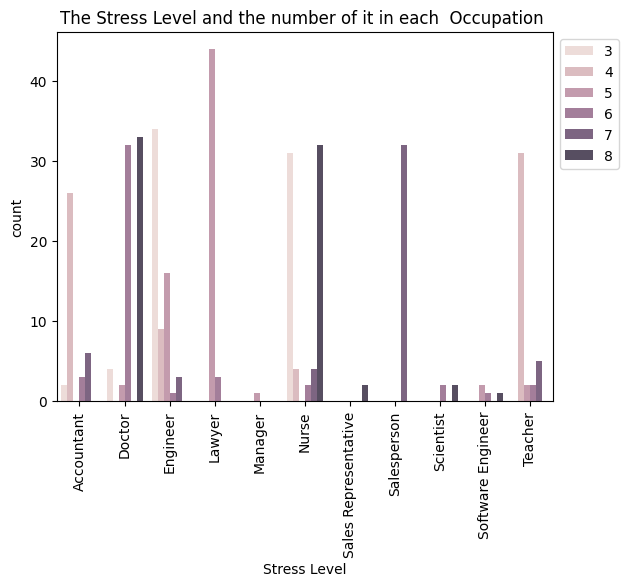

In [68]:


sns.barplot(data=position_stress,x='Occupation',y='count',hue='Stress Level', alpha=0.8,width=0.8)
plt.title('The Stress Level and the number of it in each  Occupation ')
plt.xlabel('Stress Level')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))



In [72]:
fig=px.bar(Daily_Steps_count5,x='Daily Steps',y='count',title="the top 5 Daily Steps")
fig.show()

In [73]:
df.to_csv("Data.csv")

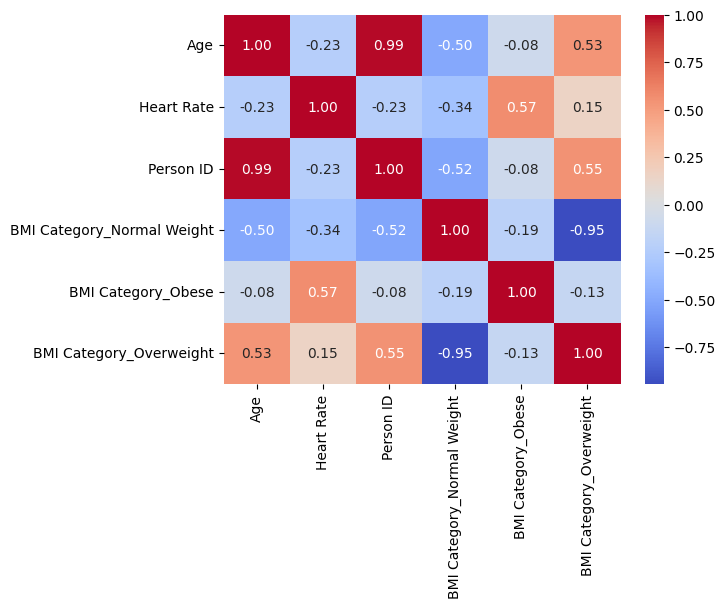

In [80]:

num_features_to_keep = len(df.columns) // 3
selected_features = np.random.choice(df.columns, num_features_to_keep, replace=False)
df_selected = df[selected_features]


df_selected_encoded = pd.get_dummies(df_selected)
corr_matrix_selected = df_selected_encoded.corr()
sns.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

